In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

We have 2 Datasets - Supply Data and Demand Data. Both the Datasets have the Date Column in common.
So after importing both the datasets, we will merge them into one common DataFrame. 

In [2]:
df1 = pd.read_csv('Hourly_DriverActivity_1.csv') # Supply Dataset
df2 = pd.read_csv('Hourly_OverviewSearch_1.csv') # Demand Dataset
df = pd.merge(df1,df2, on = 'Date', how = 'outer')

In [3]:
df.shape

(840, 12)

In [4]:
df.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0,9.0,32.0,78.0
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0,29.0,64.0,69.0
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0,5.0,39.0,89.0
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0,13.0,48.0,79.0
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0,12.0,77.0,87.0


# 1. Show which 36 hours in a week are most undersupplied. Show/describe your decision based on sample data.

In [5]:
# Coverting Date column to datetime format
df['Date'] = pd.to_datetime(df.Date)

# Extracting the hour
df['Hour'] = df.Date.dt.hour

# Extracting the Day Number and converting to Day Name
df['Day'] = df.Date.dt.isocalendar().day
days = {1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
df['Day'] = df['Day'].map(days)

# Extracting the Week Number
df['Week'] = df.Date.dt.isocalendar().week

In [6]:
df.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Hour,Day,Week
0,2016-12-18 23:00:00,52,18,6,11,11,0.3,0.67,12.0,9.0,32.0,78.0,23,Sunday,50
1,2016-12-18 22:00:00,59,20,11,9,12,0.3,1.40,28.0,29.0,64.0,69.0,22,Sunday,50
2,2016-12-18 21:00:00,72,25,7,18,15,0.3,0.64,16.0,5.0,39.0,89.0,21,Sunday,50
3,2016-12-18 20:00:00,86,29,7,23,15,0.3,0.52,15.0,13.0,48.0,79.0,20,Sunday,50
4,2016-12-18 19:00:00,82,31,14,17,19,0.4,1.16,36.0,12.0,77.0,87.0,19,Sunday,50


In [7]:
# Making a crosstab between the Day and Hour columns and aggregating values from the Online (h) column
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
week_supply = pd.crosstab(df.Day, df.Hour, values = df['Online (h)'], aggfunc = 'sum').reindex(order)
week_supply

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Monday,73,52,38,27,24,23,31,56,93,122,...,106,124,132,169,162,186,185,154,121,103
Tuesday,85,54,45,40,39,40,47,73,110,139,...,107,109,128,149,157,198,200,181,164,138
Wednesday,113,92,59,49,48,48,48,75,116,139,...,120,123,140,162,156,183,209,179,161,149
Thursday,126,102,67,46,41,44,42,58,100,141,...,108,113,130,136,170,186,199,184,176,145
Friday,123,98,77,57,39,42,35,58,88,126,...,100,108,127,175,201,213,211,224,232,195
Saturday,173,154,137,109,82,71,57,54,59,69,...,104,112,118,135,169,186,200,218,210,196
Sunday,170,163,132,118,88,73,56,49,40,51,...,109,126,121,141,147,157,167,132,115,90


In [8]:
# Finding the 36 least undersupplied hours, and adding it to a new cleaned up DataFrame

hours_list = pd.DataFrame(week_supply.T.unstack().nsmallest(36)).index.tolist()

temp = pd.DataFrame(index = list(range(36)),columns = ['Day','Hour','Online (h)'])
temp['Online (h)'] = week_supply.T.unstack().nsmallest(36).values

index = 0
for (i,j) in hours_list:
    temp.loc[index,'Day'] = i
    temp.loc[index,'Hour'] = j
    index = index + 1
    
temp.to_csv('temp.csv',index = False)

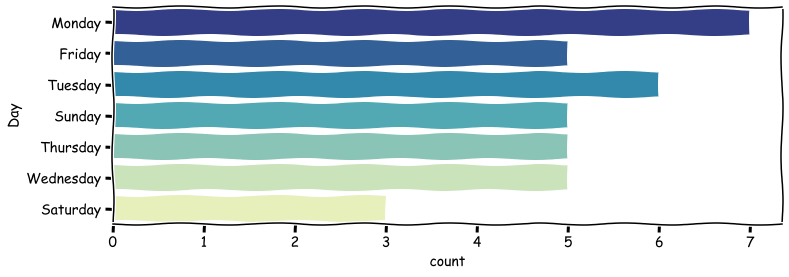

In [9]:
plt.xkcd()
plt.figure(figsize = (12,4))
sns.countplot(y = temp.Day, palette = 'YlGnBu_r')
plt.show()
#plt.tight_layout()
#plt.savefig('q1p1.png', transparent = True)

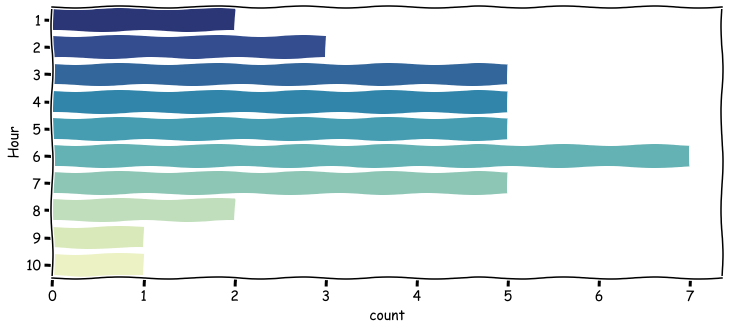

In [10]:
plt.figure(figsize = (12,5))
sns.countplot(y = temp.Hour, palette = 'YlGnBu_r')
plt.show()
#plt.tight_layout()
#plt.savefig('q1p2.png', transparent = True)

# 2. 24-hour curve of average supply and demand (to illustrate match/mismatch).

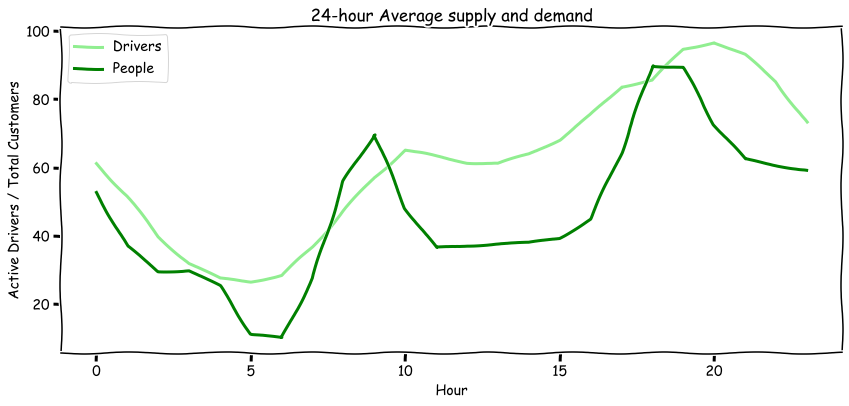

In [11]:
# Assuming the total Demand to be the sum of People who saw no cars and people who saw +1 cars. 
df['Total People'] = df['People saw 0 cars (unique)'] + df['People saw +1 cars (unique)']

# Assuming 5% of people are included in both the columns. Updating 'Total People' column to reflect unique riders.
df['Total People'] = df['Total People']*0.975

# Grouping the data based on 'Hour' and taking mean of the Supply('Active Drivers') and Demand('Total People')
supply_demand = df.groupby('Hour')[['Active drivers','Total People']].mean()

# Plotting the Curve
plt.figure(figsize = (14,6))
sns.lineplot(x = supply_demand.index, y = 'Active drivers', data = supply_demand, label = 'Drivers', lw = 3, color = 'lightgreen')
sns.lineplot(x = supply_demand.index, y = 'Total People', data = supply_demand, label = 'People', lw = 3, color = 'green')
plt.ylabel('Active Drivers / Total Customers')
plt.title('24-hour Average supply and demand')
plt.show()
#plt.tight_layout()
#plt.savefig('q2p1.png', transparent = True)

# 3. Visualisation of hours where we lack supply during a weekly period. This one we can send to drivers to show when to online for extra hours.


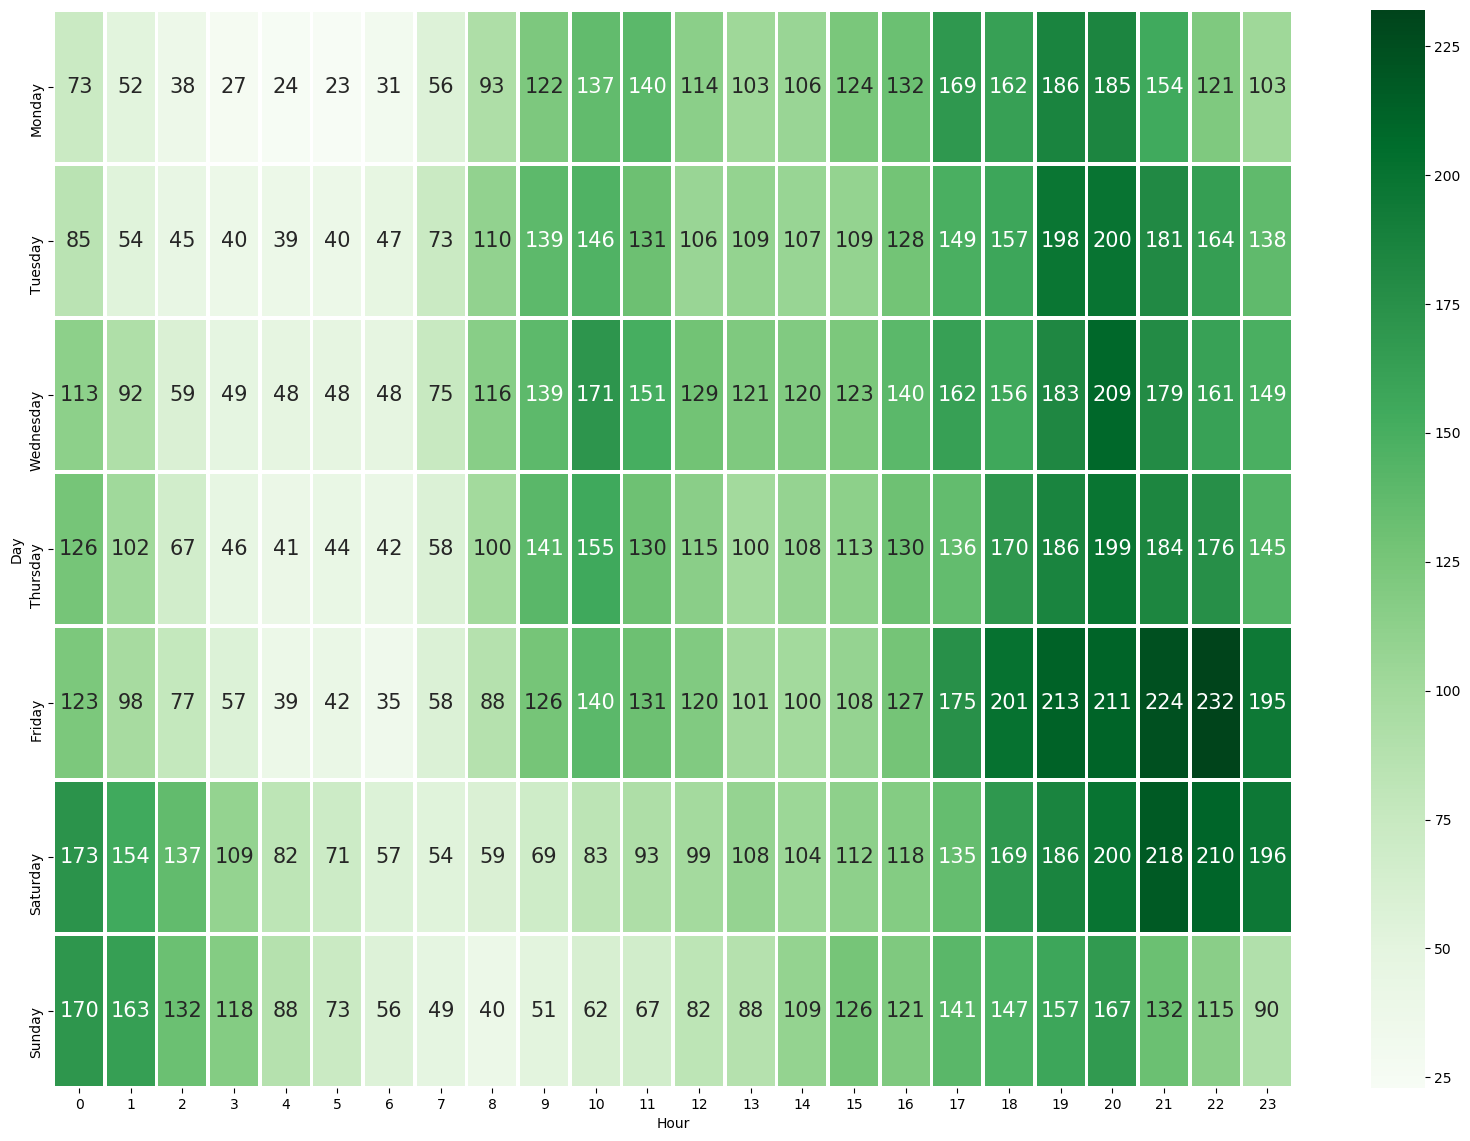

In [12]:
plt.rcdefaults()
plt.figure(figsize = (20,14))
sns.heatmap(week_supply, cmap = 'Greens',lw = 2, annot = True, fmt = '.0f', annot_kws = {'size':15})
plt.show()
#plt.tight_layout()
#plt.savefig('q3p1.png', transparent = True)

# 4. Estimate number of hours needed to ensure we have a high Coverage Ratio during most peak hours.

If we examine the question, we have 3 key phrases that we need to precisely define/assume before moving ahead:

1. 'Number of hours' - Lets assume this to be the number of supply hours (Feature variable - **Online (h)**)
2. 'High Coverage Ratio' - Lets define the **90 percentile values and above** as High Coverage Ratio.
3. 'most peak hours' - Lets define the **top 36  weekly hours where demand is highest** as most peak hours.


#### Now let's find the 90 percentile value for Coverage Ratio.

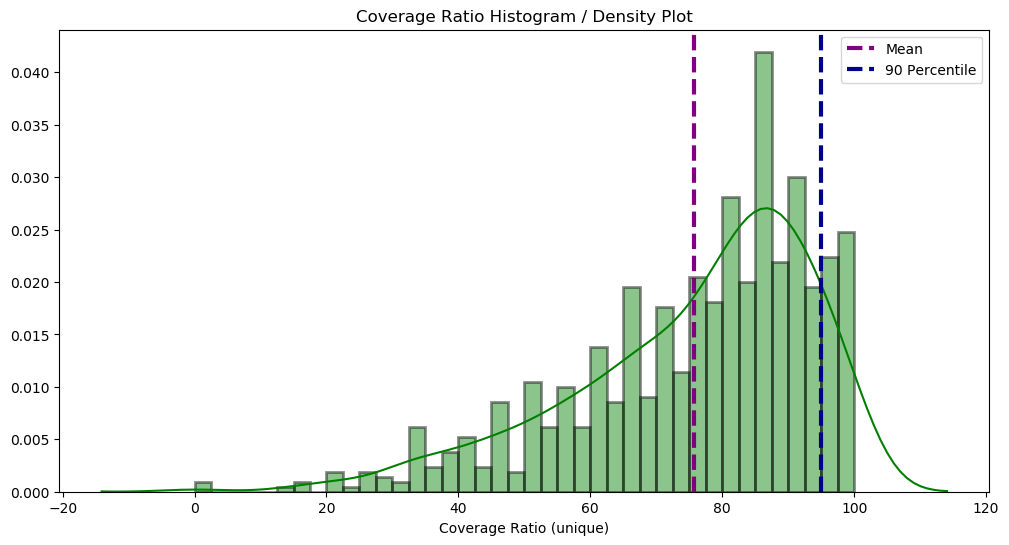

Mean value of Coverage Ratio is: 75.66150178784267
90 percentile value of Coverage Ratio is: 95.0


In [13]:
# 90 percentile value for Coverage Ratio 
plt.rcdefaults()
plt.figure(figsize = (12,6))
sns.distplot(df['Coverage Ratio (unique)'], color = 'green', bins = 40,
             hist_kws=dict(edgecolor="k", linewidth=2, alpha = 0.45))
plt.axvline(df['Coverage Ratio (unique)'].mean(), color = 'purple', lw = 3 ,label = 'Mean',linestyle='dashed')
plt.axvline(df['Coverage Ratio (unique)'].quantile(0.9), color = 'darkblue', lw = 3 ,
            label = '90 Percentile',linestyle='dashed')

plt.title('Coverage Ratio Histogram / Density Plot')
plt.legend()
plt.show()

print('Mean value of Coverage Ratio is: {}'.format(df['Coverage Ratio (unique)'].mean()))
print('90 percentile value of Coverage Ratio is: {}'.format(df['Coverage Ratio (unique)'].quantile(0.9)))

#plt.tight_layout()
#plt.savefig('q4p1.png', transparent = True)

#### Next let's find the top 36 Weekly Hours of Demand which will be the 'most peak hours.'

In [14]:
week_demand = pd.crosstab(df.Day, df.Hour, values = df['Total People'], aggfunc = 'sum')

In [15]:
# Making a list of (Day, Hour) values for the most 36 in-demand hours
lst = pd.DataFrame(week_demand.T.unstack().nlargest(36)).index.tolist()

# Making a DataFrame of the most in-demand hours.
df_peak_demand = pd.DataFrame()
for i in range(len(df)):
    if (df.Day[i],df.Hour[i]) in lst:
        df_peak_demand = df_peak_demand.append(df.iloc[i,:])

#### Note that the no. of rows is 180, which are the top 36 demand hours over 5 weeks. Thus 36 * 5 =  180

In [16]:
df_peak_demand.shape

(180, 16)

In [17]:
df_peak_demand.head()

,Active drivers,Busy (h),Coverage Ratio (unique),Date,Day,Finished Rides,Has booking (h),Hour,Hours per active driver,Online (h),People saw +1 cars (unique),People saw 0 cars (unique),Rides per online hour,Total People,Waiting for booking (h),Week
23,89.0,21.0,92.0,2016-12-18 00:00:00,Sunday,36.0,11.0,0.0,0.4,35.0,81.0,7.0,1.03,85.800,24.0,50.0
27,88.0,22.0,64.0,2016-12-17 20:00:00,Saturday,48.0,19.0,20.0,0.4,32.0,84.0,48.0,1.50,128.700,13.0,50.0
28,84.0,23.0,72.0,2016-12-17 19:00:00,Saturday,38.0,16.0,19.0,0.3,28.0,89.0,34.0,1.36,119.925,13.0,50.0
44,64.0,23.0,45.0,2016-12-17 03:00:00,Saturday,37.0,16.0,3.0,0.3,21.0,87.0,105.0,1.76,187.200,5.0,50.0
45,74.0,21.0,60.0,2016-12-17 02:00:00,Saturday,41.0,19.0,2.0,0.4,27.0,102.0,67.0,1.52,164.775,8.0,50.0


Now let's see how we can estimate number of hours needed to ensure we have a high Coverage Ratio during most peak hours.

We will have High Coverage when there in enough supply hours for the demand (Total People). But we need to define what this 'enough' supply actualy means. 
For that we will define a supply(S) to demand(D) ratio. Let's call it S/D ratio.

1. First, we will find the S/D ratio for the 90 percentile and above value. This is our desired S/D ratio (can also be called as the critical S/D ratio) for high coverage.  
2. For the hours in our peak_demand data, whose S/D ratio is less that the critical ratio, we will multiply the demand (Total People) wih our critical S/D ratio (calculated in step 1), so we get the desired supply hours.

### S/D Ratio

The ratio has 2 parameters - Demand in the denominator, and Supply in the numerator. Let's see how to define these metrics. 

**Demand:** We will use Total People as a measure of demand. 

On the **supply** side, we have 2 crucial metrics to look at - Online (h) and Waiting for Booking (h). Even though Online (h) is the main metric for supply hours that we have been using till now, Waiting for Booking (h) is likely to predict coverage ratio better. This is because, a customer is more likely to see the driver on the map if the driver is waiting for a booking. This is further clarified when we look at the corelation matrix below. The corelation between Waiting for booking (h) and Coverage Ratio is 0.71, as compared to the corelation between Online (h) and Coverage Ratio which is 0.61. 

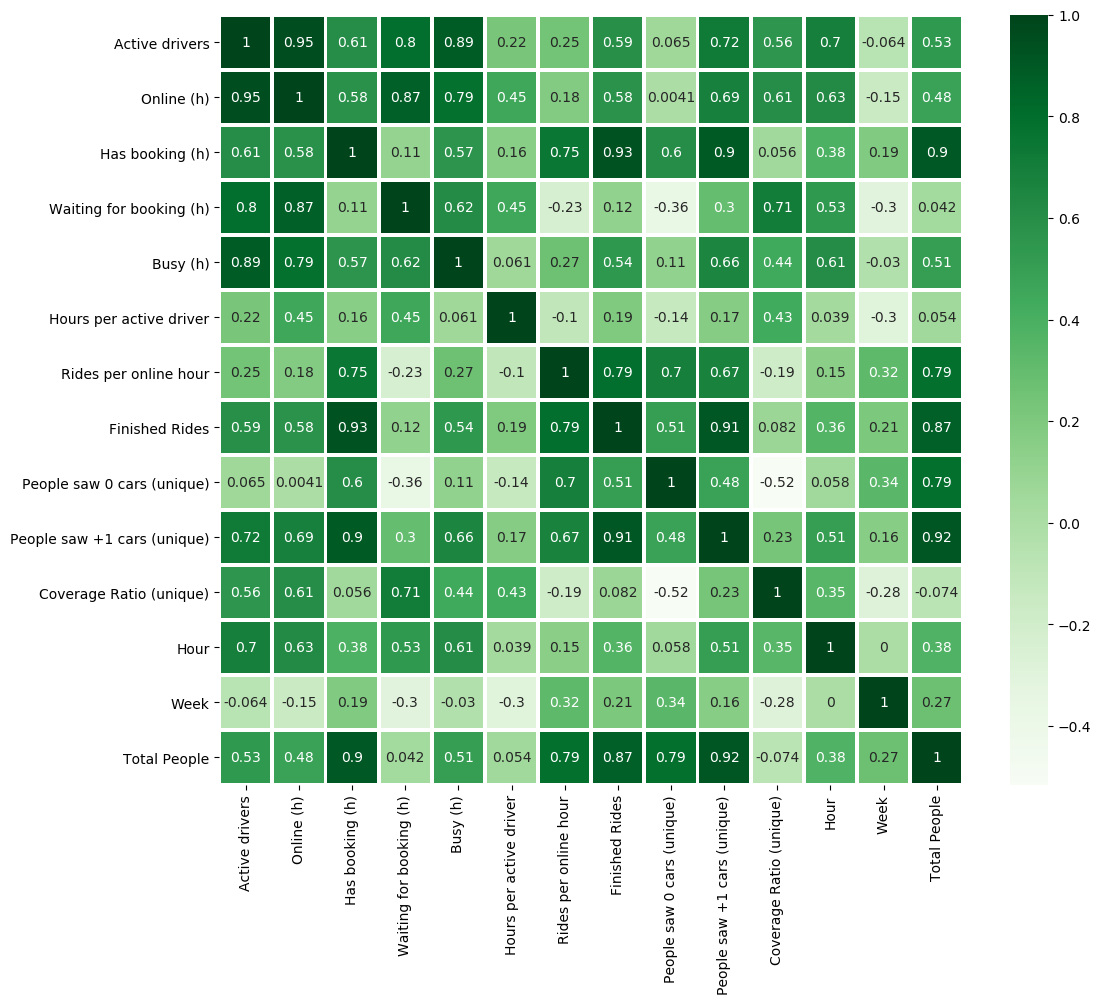

In [18]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), cmap = 'Greens',lw = 2, annot = True)
plt.show()
#plt.tight_layout()
#plt.savefig('q4p2.png', transparent = True)

We will formulate 2 different cases of S/D ratio, where the Supply metric will be different. 

#### S/D Ratio Case 1 - Supply metric as 'Online (h)'

Critical S/D ratio is: 0.8258795468097793


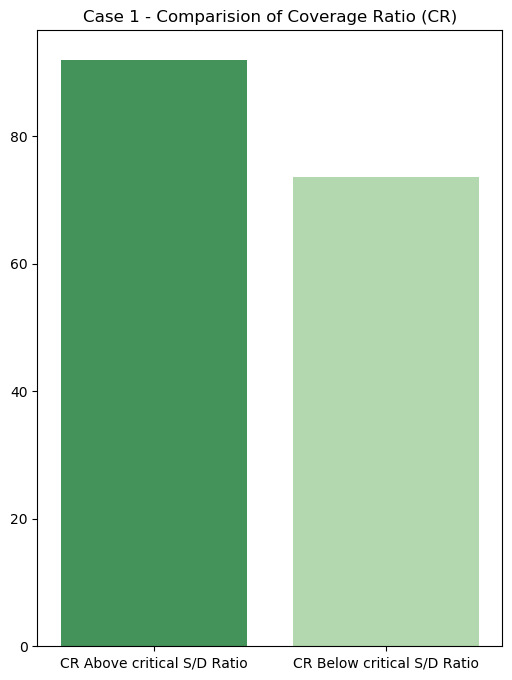

CR when S/D Ratio > 0.826: 92.04 %
CR when S/D Ratio < 0.826: 73.65 %


In [19]:
# Making a copy of the df_peak_demand DataFrame
df_peak_demand_1 = df_peak_demand.copy()

# Step 1 - Finding the Critical S/D Ratio
sd_ratio_1 = (df_peak_demand[df_peak_demand['Coverage Ratio (unique)'] > 95]['Online (h)'].sum()/df_peak_demand[df_peak_demand['Coverage Ratio (unique)'] > 95]['Total People'].sum())
print('Critical S/D ratio is:',sd_ratio_1)


#Step 2 - Comparing Mean Coverage Ratio for items above the critical S/D ratio vs the items below the ratio

# Calculating S/D ratio for each item in df_peak_demand_1
df_peak_demand_1['S/D'] = df_peak_demand_1['Online (h)'] / df_peak_demand_1['Total People']

# Plotting a bar plot for Comparision
plt.figure(figsize = (6,8))
sns.barplot(x = ['CR Above critical S/D Ratio', 'CR Below critical S/D Ratio'], 
            y = [df_peak_demand_1[df_peak_demand_1['S/D'] > sd_ratio_1]['Coverage Ratio (unique)'].mean(), df_peak_demand_1[df_peak_demand_1['S/D'] < sd_ratio_1]['Coverage Ratio (unique)'].mean()],
           palette = 'Greens_r')
plt.title('Case 1 - Comparision of Coverage Ratio (CR)')
#plt.tight_layout()
#plt.savefig('q4p3.png', transparent = True)
plt.show()

# Printing Results
print('CR when S/D Ratio > {}:'.format(round(sd_ratio_1,3)),round(df_peak_demand_1[df_peak_demand_1['S/D'] > sd_ratio_1]['Coverage Ratio (unique)'].mean(),2),'%')
print('CR when S/D Ratio < {}:'.format(round(sd_ratio_1,3)),round(df_peak_demand_1[df_peak_demand_1['S/D'] < sd_ratio_1]['Coverage Ratio (unique)'].mean(),2),'%')

In [20]:
# Step 3 - Adding updated Online hours to df_peak_demand_1
df_peak_demand_1['online_new'] = sd_ratio_1*df['Total People']

# Step 4 - Comparing mean for Online (h) before and after the update. 
print('Average Online (h) Original:', round(df_peak_demand_1['Online (h)'].mean(),2))
print('Average Online (h) to meet Peak Demand:', round(df_peak_demand_1['online_new'].mean(),2))

Average Online (h) Original: 32.66
Average Online (h) to meet Peak Demand: 70.94


#### S/D Ratio Case 2 -  Supply metric as 'Waiting for Booking (h)'

Critical S/D ratio is: 0.661896243291592


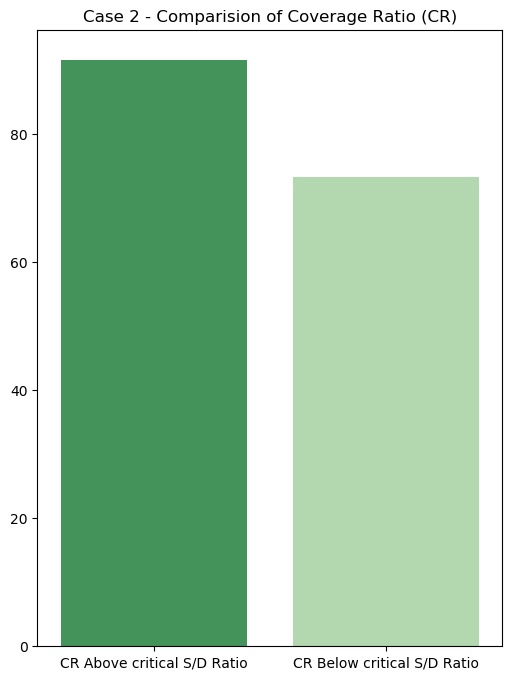

CR when S/D Ratio > 0.662: 91.65 %
CR when S/D Ratio < 0.662: 73.36 %


In [21]:
# Making a copy of the df_peak_demand DataFrame
df_peak_demand_2 = df_peak_demand.copy()

# Step 1 - Critical S/D Ratio
sd_ratio_2 = (df_peak_demand[df_peak_demand['Coverage Ratio (unique)'] > 95]['Waiting for booking (h)'].sum()/df_peak_demand[df_peak_demand['Coverage Ratio (unique)'] > 95]['Total People'].sum())
print('Critical S/D ratio is:',sd_ratio_2)


#Step 2 - Comparing Mean Coverage Ratio for items above the desired S/D ratio vs the items below the ratio

# Calculating S/D ratio for each item in df_peak_demand_1
df_peak_demand_2['S/D'] = df_peak_demand_2['Waiting for booking (h)'] / df_peak_demand_2['Total People']

# Plotting a bar plot for Comparision
plt.figure(figsize = (6,8))
sns.barplot(x = ['CR Above critical S/D Ratio', 'CR Below critical S/D Ratio'], 
            y = [df_peak_demand_2[df_peak_demand_2['S/D'] > sd_ratio_2]['Coverage Ratio (unique)'].mean(), df_peak_demand_2[df_peak_demand_2['S/D'] < sd_ratio_2]['Coverage Ratio (unique)'].mean()],
           palette = 'Greens_r')
plt.title('Case 2 - Comparision of Coverage Ratio (CR)')
#plt.tight_layout()
#plt.savefig('q4p4.png', transparent = True)
plt.show()

# Printing Results
print('CR when S/D Ratio > {}:'.format(round(sd_ratio_2,3)),round(df_peak_demand_2[df_peak_demand_2['S/D'] > sd_ratio_2]['Coverage Ratio (unique)'].mean(),2),'%')
print('CR when S/D Ratio < {}:'.format(round(sd_ratio_2,3)),round(df_peak_demand_2[df_peak_demand_2['S/D'] < sd_ratio_2]['Coverage Ratio (unique)'].mean(),2),'%')

In [22]:
# Step 3 - Adding updated Online hours to df_peak_demand_1
df_peak_demand_2['Waiting for booking new'] = sd_ratio_2*df['Total People']

# Step 4 - Comparing mean for Online (h) before and after the update. 
print('Average Online (h) Original:', round(df_peak_demand_2['Waiting for booking (h)'].mean(),2))
print('Average Online (h) to meet Peak Demand:', round(df_peak_demand_2['Waiting for booking new'].mean(),2))

Average Online (h) Original: 19.83
Average Online (h) to meet Peak Demand: 56.85


### Inferences:

1. In both the cases, the average Coverage Ratio jumps by ~20% when all S/D ratios are maintained above the critical S/D ratio, which is definitely a good sign. 

2. On the other hand, the average 'Online (h)' needed to maintain the higher coverage ratio is almost 4 times than before. This is ideally undesirable and would be an expensive affair. Similarly the average 'Waiting for booking (h)' needed to maintain the higher Coverage ration is more than 2 times than before. 

3. It's important to note that predicting the Coverage Ratio is not a uni-variate problem. As the corelation between 'Online (h)' or 'Waiting for Booking (h)' with 'Coverage Ratio' is 0.61 and 0.71 respectively, neither of them can predict the Coverage Ratio with good accuracy. 

4. A potential way forward could be building a regression model based on a sub-selection of the existing features, along with additional features not mentioned in the existing datasets. The model could have a dual purpose. First - help us predict coverage ratio, and second - help us understand which features have the most predictive power on Coverage Ratio. 

In [23]:
df_peak_demand_1.head()

,Active drivers,Busy (h),Coverage Ratio (unique),Date,Day,Finished Rides,Has booking (h),Hour,Hours per active driver,Online (h),People saw +1 cars (unique),People saw 0 cars (unique),Rides per online hour,Total People,Waiting for booking (h),Week,S/D,online_new
23,89.0,21.0,92.0,2016-12-18 00:00:00,Sunday,36.0,11.0,0.0,0.4,35.0,81.0,7.0,1.03,85.800,24.0,50.0,0.407925,70.860465
27,88.0,22.0,64.0,2016-12-17 20:00:00,Saturday,48.0,19.0,20.0,0.4,32.0,84.0,48.0,1.50,128.700,13.0,50.0,0.248640,106.290698
28,84.0,23.0,72.0,2016-12-17 19:00:00,Saturday,38.0,16.0,19.0,0.3,28.0,89.0,34.0,1.36,119.925,13.0,50.0,0.233479,99.043605
44,64.0,23.0,45.0,2016-12-17 03:00:00,Saturday,37.0,16.0,3.0,0.3,21.0,87.0,105.0,1.76,187.200,5.0,50.0,0.112179,154.604651
45,74.0,21.0,60.0,2016-12-17 02:00:00,Saturday,41.0,19.0,2.0,0.4,27.0,102.0,67.0,1.52,164.775,8.0,50.0,0.163860,136.084302


In [24]:
df_peak_demand_2.head()

,Active drivers,Busy (h),Coverage Ratio (unique),Date,Day,Finished Rides,Has booking (h),Hour,Hours per active driver,Online (h),People saw +1 cars (unique),People saw 0 cars (unique),Rides per online hour,Total People,Waiting for booking (h),Week,S/D,Waiting for booking new
23,89.0,21.0,92.0,2016-12-18 00:00:00,Sunday,36.0,11.0,0.0,0.4,35.0,81.0,7.0,1.03,85.800,24.0,50.0,0.279720,56.790698
27,88.0,22.0,64.0,2016-12-17 20:00:00,Saturday,48.0,19.0,20.0,0.4,32.0,84.0,48.0,1.50,128.700,13.0,50.0,0.101010,85.186047
28,84.0,23.0,72.0,2016-12-17 19:00:00,Saturday,38.0,16.0,19.0,0.3,28.0,89.0,34.0,1.36,119.925,13.0,50.0,0.108401,79.377907
44,64.0,23.0,45.0,2016-12-17 03:00:00,Saturday,37.0,16.0,3.0,0.3,21.0,87.0,105.0,1.76,187.200,5.0,50.0,0.026709,123.906977
45,74.0,21.0,60.0,2016-12-17 02:00:00,Saturday,41.0,19.0,2.0,0.4,27.0,102.0,67.0,1.52,164.775,8.0,50.0,0.048551,109.063953


# 5. Calculate levels of guaranteed hourly earnings we can offer to drivers during 36 weekly hours with highest demand without losing money + how much extra hours we want to get to capture missed demand.

There are 2 methods we can calculate guaranteed hourly earnings:
1. Based on 'Active Drivers' - This will be Earnings per Active Driver per hour.
2. Based on 'Online (h)' - This will Earnings per Active Driver per hour of online supply.

We will use df_peak_demand_1 for this question, as it's a dataframe of 36 weekly hours with highest demand. Futhermore the 'online_new' column already takes into account the second part of this question which is to capture missed demand. 

### Step 1
Calculate total number of finished rides in this peak demand time-period. 

### Step 2
Find out total money earned by drivers for finished rides. This will be (no. of rides) * (average earnings per ride for the driver).

### Step 3
**For Method 1:** Divide the total money earned by total Active Drivers. This will give us Earnings per Active Driver per hour

**For Method 2:** Divide the total money earned by total Online (h). This will give us Earnings per Active Driver per hour of online supply.

In [25]:
df_peak_demand_1.head()

,Active drivers,Busy (h),Coverage Ratio (unique),Date,Day,Finished Rides,Has booking (h),Hour,Hours per active driver,Online (h),People saw +1 cars (unique),People saw 0 cars (unique),Rides per online hour,Total People,Waiting for booking (h),Week,S/D,online_new
23,89.0,21.0,92.0,2016-12-18 00:00:00,Sunday,36.0,11.0,0.0,0.4,35.0,81.0,7.0,1.03,85.800,24.0,50.0,0.407925,70.860465
27,88.0,22.0,64.0,2016-12-17 20:00:00,Saturday,48.0,19.0,20.0,0.4,32.0,84.0,48.0,1.50,128.700,13.0,50.0,0.248640,106.290698
28,84.0,23.0,72.0,2016-12-17 19:00:00,Saturday,38.0,16.0,19.0,0.3,28.0,89.0,34.0,1.36,119.925,13.0,50.0,0.233479,99.043605
44,64.0,23.0,45.0,2016-12-17 03:00:00,Saturday,37.0,16.0,3.0,0.3,21.0,87.0,105.0,1.76,187.200,5.0,50.0,0.112179,154.604651
45,74.0,21.0,60.0,2016-12-17 02:00:00,Saturday,41.0,19.0,2.0,0.4,27.0,102.0,67.0,1.52,164.775,8.0,50.0,0.163860,136.084302


### Step 1

In [26]:
total_finished_rides = df['Finished Rides'].sum()
print('Total Finished Rides:', total_finished_rides)

Total Finished Rides: 11738.0


### Step 2

In [27]:
total_money_earned = total_finished_rides * 8  #Drivers get 80% of the €10 average ride fare.
print('Total Money Earned:', total_money_earned)

Total Money Earned: 93904.0


### Step 3

In [28]:
# Method 1
per_driver_per_hour = total_money_earned / df['Active drivers'].sum()
print('Earnings per Active Driver per hour: €', round(per_driver_per_hour,2))

# Method 2
per_driver_per_online_supply_hour = total_money_earned / df['Online (h)'].sum()
print('Earnings per Active Driver per hour of Online supply: €', round(per_driver_per_online_supply_hour,2))

Earnings per Active Driver per hour: € 1.81
Earnings per Active Driver per hour of Online supply: € 4.82


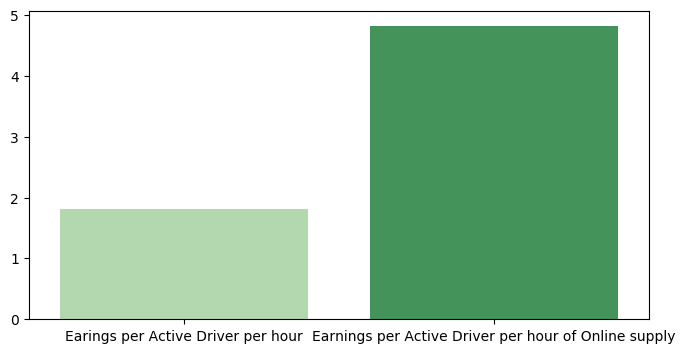

In [29]:
plt.figure(figsize = (8,4))
sns.barplot(x = ['Earings per Active Driver per hour','Earnings per Active Driver per hour of Online supply'],
           y = [1.81,4.82], palette = 'Greens')
plt.show()
#plt.tight_layout()
#plt.savefig('q5p1.png', transparent = True)

#### As a recommedation - 'Earnings per Active Driver per hour of Online supply' should be the go to metric for hourly payment during peak hours

This hourly wage can be increased and further optimised by building a regressor ML model that predicts the coverage ratio with a good accuracy and informs us of the key variables that influence the coverage ratio with a strong predictive power.